Cálculo de distancia entre coordenadas

In [10]:
import math

Fórmula de Harvesine

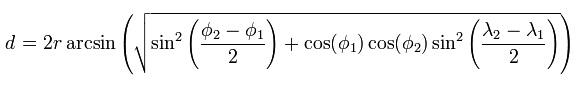

In [2]:
def cdCoord(la1,lo1,la2,lo2):
  RT=6371
  Dla=la2-la1
  Dlo=lo2-lo1

  rla1=math.radians(la1)
  rla2=math.radians(la2)
  rdla=math.radians(Dla/2)
  rdlo=math.radians(Dlo/2)
  sla=math.sin(rdla)
  slo=math.sin(rdlo)
  
  p1=sla**2
  p2=math.cos(rla1)*math.cos(rla2)*(slo**2)
  fc=math.sqrt(p1+p2)
  d=2*RT*math.asin(fc)

  return d

In [ ]:
cla1=-12.09952
clo1=-76.98974
cla2=-12.09989
clo2=-76.98911
D=cdCoord(cla1,clo1,cla2,clo2)
strd="La distancia es: "+str(round(D,5))+" Km"
print(strd)

La distancia es: 0.0799 Km


Para nuestro formato de (latitud,longitud)

In [6]:
def Dcoord2(C1,C2):
  la1=C1[0]
  lo1=C1[1]
  la2=C2[0]
  lo2=C2[1]
  D=cdCoord(la1,lo1,la2,lo2)
  return D


In [ ]:
c1=(-12.09952,-76.98974)
c2=(-12.09989,-76.98911)
Dcoord2(c1,c2)

0.07990274891193774

Función para hallar peso de aristas

In [7]:
import random 

In [8]:
def rangoTrafico():
  rtraf=[]
  madrugada=0
  mañana=7
  tarde=13
  noche=20
  for i in range(24):
    if (i>=madrugada and i<mañana):
      rtraf.append(random.uniform(0.3,0.9))
    elif (i>=mañana and i<tarde):
      rtraf.append(random.uniform(0.2,0.6))
    elif (i>=tarde and i<noche):
      rtraf.append(random.uniform(0.9,1.5))
    else:
      rtraf.append(random.uniform(1.1,1.3))
  return rtraf

def hallarPeso(longitud, hora):
  Traf=rangoTrafico()
  P=0

  if(hora>=0 and hora<=23):
    P=longitud+longitud*Traf[hora]
  else:
    if(hora>=24):
      P=hallarPeso(longitud,hora-24)
    if(hora<0):
      P=hallarPeso(longitud,hora+24)
  return P


In [13]:
#Hallar peso en base a la hora del día
Hora=int(input("Hora actual: "))
c1=(-12.09952,-76.98974)
c2=(-12.09989,-76.98911)
D=Dcoord2(c1,c2)
P=hallarPeso(D,Hora)
strd=str(Hora)+" horas: El peso de la arista es: "+ str(round(P,3))
print(strd)

Hora actual: 17
17 horas: El peso de la arista es: 0.185


<h7>Para hallar el camino más corto usaremos el algoritmo de Kruskal

In [ ]:
class DisjointSet:
    def __init__(self, n):
        self.s = [-1]*n

    def find(self, a):
        if self.s[a] < 0:
            return a
        parent = self.find(self.s[a])
        self.s[a] = parent
        return parent

    def sameset(self, a, b):
        return self.find(a) == self.find(b)

    def union(self, a, b):
        if self.sameset(a, b):
            return
        a = self.find(a)
        b = self.find(b)
        if -self.s[a] > -self.s[b]:
            self.s[a] += self.s[b]
            self.s[b] = a
        else:
            self.s[b] += self.s[a]
            self.s[a] = b

In [ ]:
def kruskal(G):
  n=len(G)
  edges=[(w,u,v) for u in range(n) for v,w in G[u]]
  edges.sort()
  edges=list(reversed(edges))
  T=[]
  ds=DisjointSet(n)
  links=0
  while len(T)<n-1:
    _,u,v=edges.pop()
    if not ds.sameset(u,v):
      ds.union(u,v)
      links+=1
      T.append((u,v))
    if links==n-1: break
  return T

In [ ]:
!git clone https://github.com/JeffersonOrtega2018/TF-201410183-201617515-201920273.git

In [ ]:
%%file coordenadas.txt
1 (-12.09465,-77.00591)
2 (-12.09452,-77.00429)
3 (-12.09455,-77.00272)
4 (-12.09427,-77.00021)
5 (-12.09363,-77.00969)
6 (-12.09317,-76.99568)
7 (-12.09569,-76.99110)
8 (-12.09635,-76.98631)
9 (-12.09410,-77.00597)
10 (-12.09081,-77.00240)
11 (-12.09072,-77.00183)
12 (-12.09353,-77.00604)
13 (-12.09123,-77.00484)
14 (-12.09032,-76.99907)
15 (-12.09024,-76.99848)
16 (-12.08941,-76.99084)
17 (-12.08943,-76.99286)
18 (-12.08952,-76.99020)
19 (-12.08980,-76.99540)
20 (-12.09111,-76.98661)
21 (-12.09156,-76.98603)
22 (-12.09148,-76.98580)
23 (-12.09441,-77.00604)
24 (-12.09521,-77.00583)
25 (-12.09782,-77.00598)
26 (-12.10302,-77.00625)
27 (-12.10516,-77.00627)
28 (-12.09510,-77.00431)

Writing coordenadas.txt


In [ ]:
%%file intersect.txt
1 - 01 03
2 - 01 04
3 - 01 05
4 - 01 06 
5 - 01 49 
6 - 01 60
7 - 01 118
8 - 01 208 
9 - 02 01
10 - 02 30

Overwriting intersect.txt


In [ ]:
%%file coordenadas.txt
1 (-12.09465,-77.00591)
2 (-12.09452,-77.00429)
3 (-12.09455,-77.00272)
4 (-12.09427,-77.00021)
5 (-12.09363,-77.00969)
6 (-12.09317,-76.99568)
7 (-12.09569,-76.99110)
8 (-12.09635,-76.98631)
9 (-12.09410,-77.00597)
10 (-12.09081,-77.00240)

Writing coordenadas.txt


In [ ]:
%%file graph.txt
01 03
01 04
01 05
01 06 
01 49 
01 60
01 118
01 208 
02 01
02 30
02 31
02 33
02 38
02 65
02 67
02 73
02 79
02 82
02 89
02 105
02 195
02 209
03 02
03 08
03 21
03 158
03 166
04 08
05 01
05 02
05 08
05 48
05 51
05 165
05 188
05 189
06 08
06 16
06 18
06 23
07 01
07 08
07 48
07 51
08 09
08 10
08 11
08 25
08 58
08 60
08 61
08 71
08 118
08 134
08 136
08 138
08 142
09 16
09 17
09 18
09 21
09 23
09 165
09 166
09 172
10 12
10 14
10 15
10 22
10 27
10 159
10 163
10 165
11 12
11 26
12 03
12 10
12 11
13 12
13 22
13 26
13 27
13 28
15 11
15 13
17 05
17 06
18 06
18 20
19 06
19 09
20 19
21 05
21 08
21 10
21 11
21 13
21 166
21 176
21 177
21 178
21 182
22 03
22 05
22 09
22 21
22 105
22 130
22 146
22 155
22 162
22 164
22 171
23 22
23 24
26 10
27 11
29 07
29 31
30 29
31 01
31 32
31 53
33 34
33 35
33 41
33 50
35 36
36 05
36 34
36 37
37 01
37 02
37 39
38 41
39 40
40 02
41 01
41 40
41 42
41 43
41 44
41 45  
42 39
43 39
44 02
45 46
46 41
46 47
47 33
48 31
48 37
48 38
48 54
48 73
48 83
48 96
48 97
48 98
48 104
48 210
48 215
49 44
49 48
49 143
49 149
50 01
50 22
50 137
50 138 
51 30
51 31
51 52
51 55
51 62
51 65
51 70
52 53
53 54
54 51
55 02
55 29
55 32
55 53
55 56
56 31
57 08  
58 57
58 59
58 60
58 71
59 08
60 02 
60 29
60 121
60 124
60 127
60 183
60 194
60 211
61 58
62 02 
62 29
63 29
63 64
64 65
65 29
65 68
66 65
67 66
68 63

Writing graph.txt


In [ ]:
with open("graph.txt") as f:
    edges = []
    n = 0
    for line in f:
        u, v = [int(x) for x in line.split()]
        edges.append((u-1, v-1))
        if u > n:
            n = u
        if v > n:
            n = v

    G=[[] for _ in range(n)]
    for u, v in edges:
        G[u].append(v)

for l in G:
    print(l)
    

[2, 3, 4, 5, 48, 59, 117, 207]
[0, 29, 30, 32, 37, 64, 66, 72, 78, 81, 88, 104, 194, 208]
[1, 7, 20, 157, 165]
[7]
[0, 1, 7, 47, 50, 164, 187, 188]
[7, 15, 17, 22]
[0, 7, 47, 50]
[8, 9, 10, 24, 57, 59, 60, 70, 117, 133, 135, 137, 141]
[15, 16, 17, 20, 22, 164, 165, 171]
[11, 13, 14, 21, 26, 158, 162, 164]
[11, 25]
[2, 9, 10]
[11, 21, 25, 26, 27]
[]
[10, 12]
[]
[4, 5]
[5, 19]
[5, 8]
[18]
[4, 7, 9, 10, 12, 165, 175, 176, 177, 181]
[2, 4, 8, 20, 104, 129, 145, 154, 161, 163, 170]
[21, 23]
[]
[]
[9]
[10]
[]
[6, 30]
[28]
[0, 31, 52]
[]
[33, 34, 40, 49]
[]
[35]
[4, 33, 36]
[0, 1, 38]
[40]
[39]
[1]
[0, 39, 41, 42, 43, 44]
[38]
[38]
[1]
[45]
[40, 46]
[32]
[30, 36, 37, 53, 72, 82, 95, 96, 97, 103, 209, 214]
[43, 47, 142, 148]
[0, 21, 136, 137]
[29, 30, 51, 54, 61, 64, 69]
[52]
[53]
[50]
[1, 28, 31, 52, 55]
[30]
[7]
[56, 58, 59, 70]
[7]
[1, 28, 120, 123, 126, 182, 193, 210]
[57]
[1, 28]
[28, 63]
[64]
[28, 67]
[64]
[65]
[62]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
%%file literal.txt
0	1	1	0
1	0	0	1
1	0	0	0
0	1	0	0

Writing literal.txt


In [ ]:
import numpy as np

In [ ]:
G1 = np.loadtxt("literal.txt", dtype=int, delimiter="\t")
print(G1)

n = len(G1)
G2 = [[] for _ in range(n)]
for i in range(n):
    for j in range(n):
        if G1[i, j] != 0:
            G2[i].append(j)

for l in G2:
    print(l)

[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]
[1, 2]
[0, 3]
[0]
[1]


In [ ]:
from TF-201410183-201617515-201920273 import TP_Intersecciones_Final.txt

SyntaxError: ignored